# Strawberry Yield Forecasting using Time Series

## 1.Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## 2.Reading and Displaying the Dataset

In [ ]:
df= pd.read_excel("/content/Soil_Yield_Price_5W.xlsx", parse_dates=['Date'], index_col='Date')

In [ ]:
df #This is known as Panel Data

,Price,Yield,UTC_DATE,T_CALC,T_HR_AVG,T_MAX,T_MIN,P_CALC,SOLARAD,SOLARAD_MAX,...,SUR_TEMP_MAX,SUR_TEMP_MIN,RH_HR_AVG,PDSI,Palmer Z-index,SPI,SPEI,Self-calibrated PDSI,Soil Moisture,Soil Temperature
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-22,1.212425,106.648998,2011-04-30,16.683333,16.829167,24.3,7.5,0.000000,329.500000,990,...,29.7,5.5,33.541667,3.61,-1.43,-0.97,-0.81,1.94,0.195538,23.029219
2011-10-23,1.211449,101.277216,2011-05-01,16.141667,15.075000,21.3,7.6,0.016667,331.625000,992,...,30.6,5.7,55.875000,3.63,1.15,1.08,1.02,2.04,0.191317,22.941509
2011-10-24,1.030000,125.000000,2011-05-02,15.600000,15.708333,21.7,7.6,0.016667,332.083333,997,...,31.1,5.5,56.500000,3.63,1.15,1.08,1.02,2.04,0.187171,23.314857
2011-10-25,1.000000,143.000000,2011-05-03,16.270833,16.083333,22.3,9.4,0.000000,325.500000,977,...,32.5,7.5,66.875000,3.63,1.15,1.08,1.02,2.04,0.183454,23.823008
2011-10-26,1.000000,106.000000,2011-05-04,16.608333,16.595833,24.3,10.1,0.000000,323.500000,971,...,33.8,8.3,74.083333,3.63,1.15,1.08,1.02,2.04,0.179729,24.544578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-15,1.560000,103.000000,2019-05-24,13.495833,13.541667,17.5,8.9,0.000000,307.583333,960,...,28.5,6.3,83.875000,3.42,3.03,1.77,1.58,1.85,0.195267,19.849742
2019-11-16,1.546563,108.751157,2019-05-25,14.483333,14.441667,17.7,12.4,0.000000,232.791667,1175,...,27.4,11.1,83.416667,3.42,3.03,1.77,1.58,1.85,0.176313,23.715492
2019-11-17,1.543746,94.803127,2019-05-26,13.829167,13.858333,17.1,11.1,0.000000,216.541667,1503,...,26.8,8.7,81.000000,3.42,3.03,1.77,1.58,1.85,0.171783,24.647220


## 3.Visualizing the Yield over the years 2011-2019

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value'):
    plt.figure(figsize=(16,5))
    plt.plot(y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

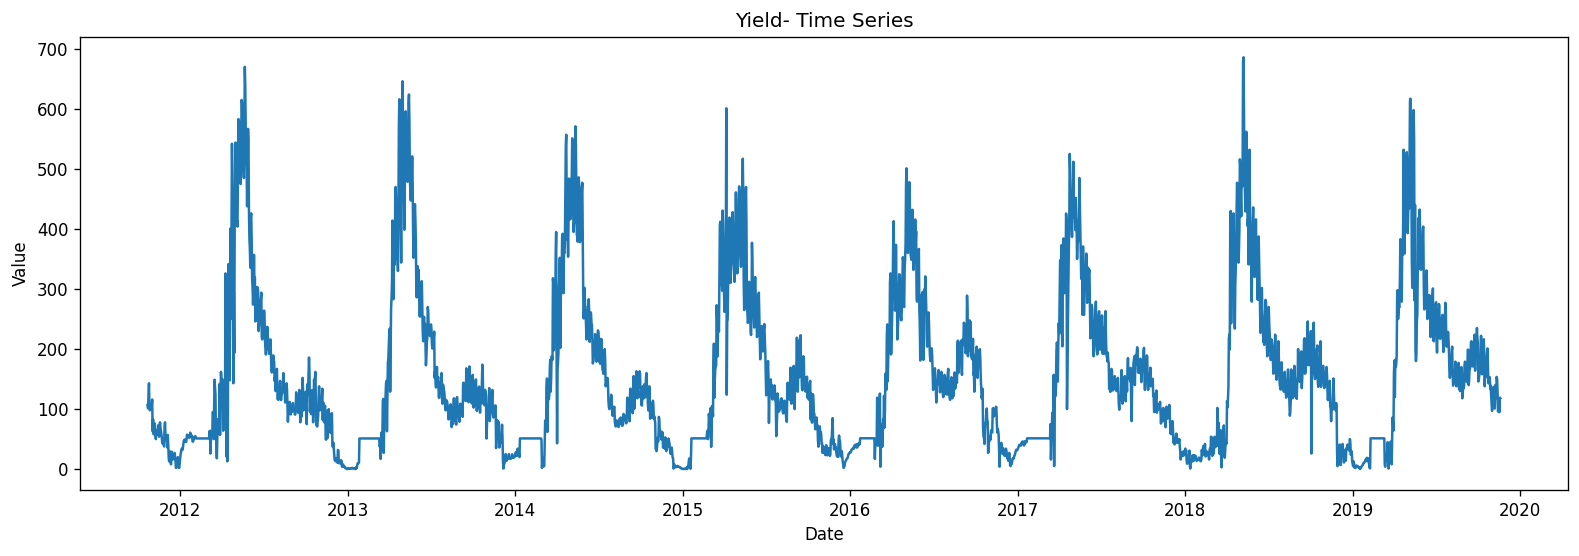

In [ ]:
plot_df(df, x=df.index, y=df["Yield"], title='Yield- Time Series')

## 4.Seasonality Plot of the Yield for Each Year

In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [ ]:
def seasonality_plot(x, variable, title="", xlabel='Month', ylabel=""):
  fig, ax = plt.subplots(figsize=(15, 6))
  sns.lineplot(df['month'], variable, hue=df['year'])
  ax.set_title(title, fontsize = 20, loc='center', fontdict=dict(weight='bold'))
  ax.set_xlabel(xlabel, fontsize = 16, fontdict=dict(weight='bold'))
  ax.set_ylabel(ylabel, fontsize = 16, fontdict=dict(weight='bold'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


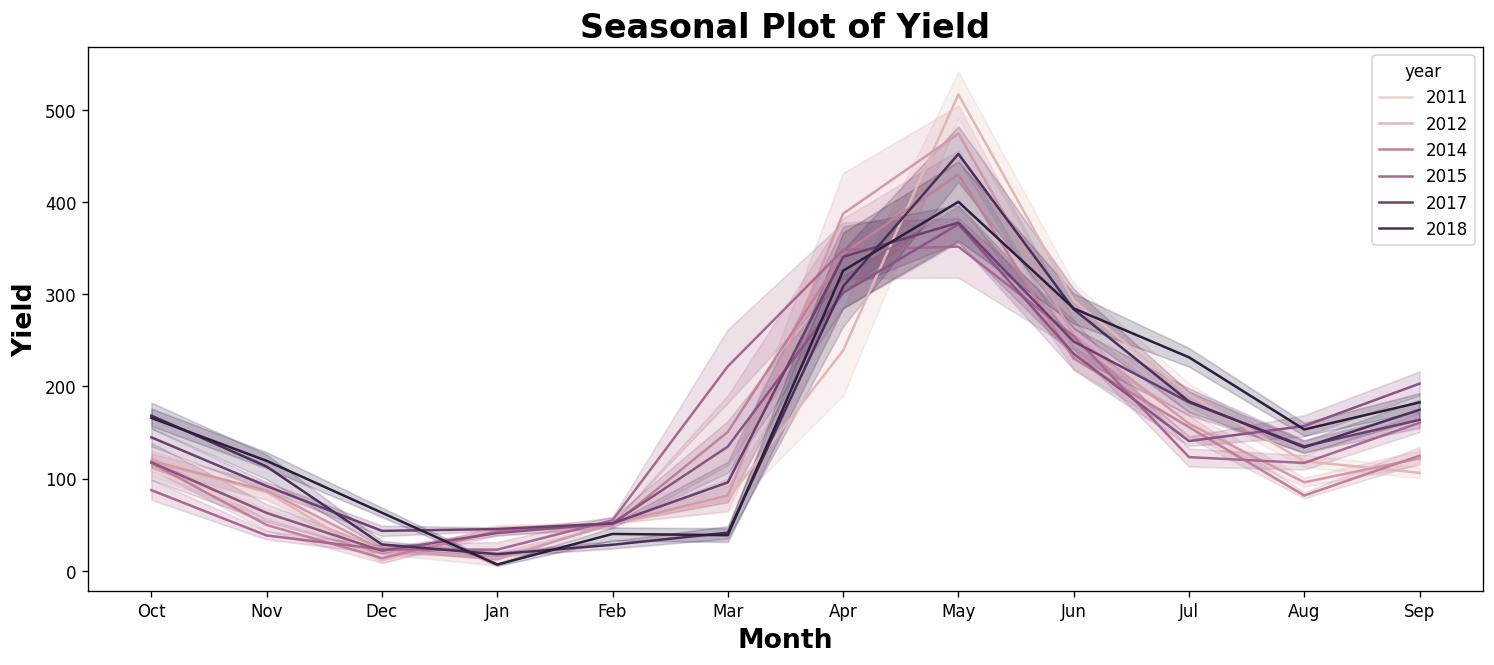

In [ ]:
seasonality_plot(df["month"], df["Yield"], "Seasonal Plot of Yield","Month", "Yield");

Inference: 
*   April To June - Higher Yield
*   July to March -  Lower Yield

## 5.Augmented Dickey–Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def ADFTest(timeseries):
  result = adfuller(timeseries, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
      print('Critial Values:')
      print(f'{key}, {value}')

In [ ]:
ADFTest(df.Yield.values) #Stationary

ADF Statistic: -6.401855338857642
p-value: 1.9865112793546568e-08
Critial Values:
1%, -3.4325899226553007
Critial Values:
5%, -2.862529648766977
Critial Values:
10%, -2.5672968177028945


## 6.Making the Data Stationary

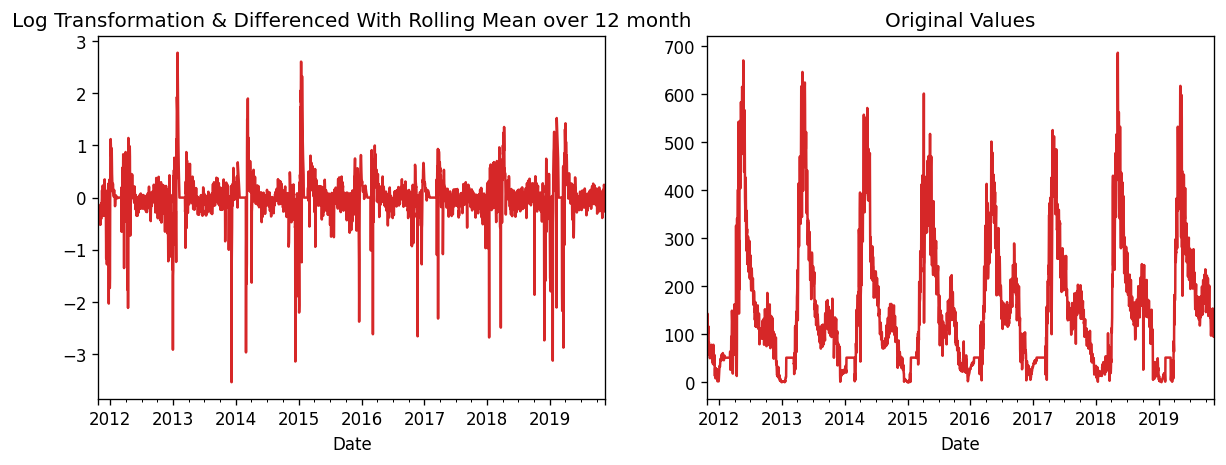

In [ ]:
logged_yield = pd.DataFrame(df['Yield'].apply(lambda x : np.log(x)))

rolling_mean = logged_yield.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_yield['Yield'] - rolling_mean['Yield']

df["passengers_log_rolled_detrended_diff"] = passengers_log_rolled_detrended - passengers_log_rolled_detrended.shift()

ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df['Yield'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
df.dropna(inplace=True)

In [ ]:
ADFTest(df["passengers_log_rolled_detrended_diff"])

ADF Statistic: -15.082756236871138
p-value: 8.408370404494491e-28
Critial Values:
1%, -3.432599167616887
Critial Values:
5%, -2.8625337318595023
Critial Values:
10%, -2.5672989915093116


In [ ]:
def normalize_df(data):
    
    #normalize the dataset for working with the lstm 
    scaler = MinMaxScaler().fit(data)
    data_normd = scaler.transform(data)
    
    #return as dataframe
    #data = pd.DataFrame(data_normd, index=data.index, columns=data.columns)
    
    return data_normd, scaler

In [ ]:
df["passengers_log_rolled_detrended_diff"]
scaler= normalize_df(np.array(df["passengers_log_rolled_detrended_diff"]).reshape(-1, 1))

In [ ]:
TEST_SET_SIZE = 45 # number of weeks left for the test set

data = df['passengers_log_rolled_detrended_diff'].values
train_set, test_set = data[:-TEST_SET_SIZE], data[-TEST_SET_SIZE:]

## 7.Autoregressive Models

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
def AR_model(train,test):
    # fit model
    model = AutoReg(train, lags=45)
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1) #?
    res=pd.DataFrame({"Prediction":yhat, "Actual":test})
    return res, yhat

In [ ]:
df_ret, yhat = AR_model(train_set, test_set)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [ ]:
from sklearn.metrics import mean_squared_error as mse
error = mse(test_set, yhat)
print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 0.000316
test RMSE: 0.0178


In [ ]:
df_ret

,Prediction,Actual
0,0.497912,0.499745
1,0.491254,0.505683
2,0.489556,0.501168
3,0.471448,0.452831
4,0.490045,0.480739
5,0.496364,0.512570
6,0.493396,0.487443
7,0.494200,0.487201
8,0.491278,0.509326
9,0.488339,0.462801


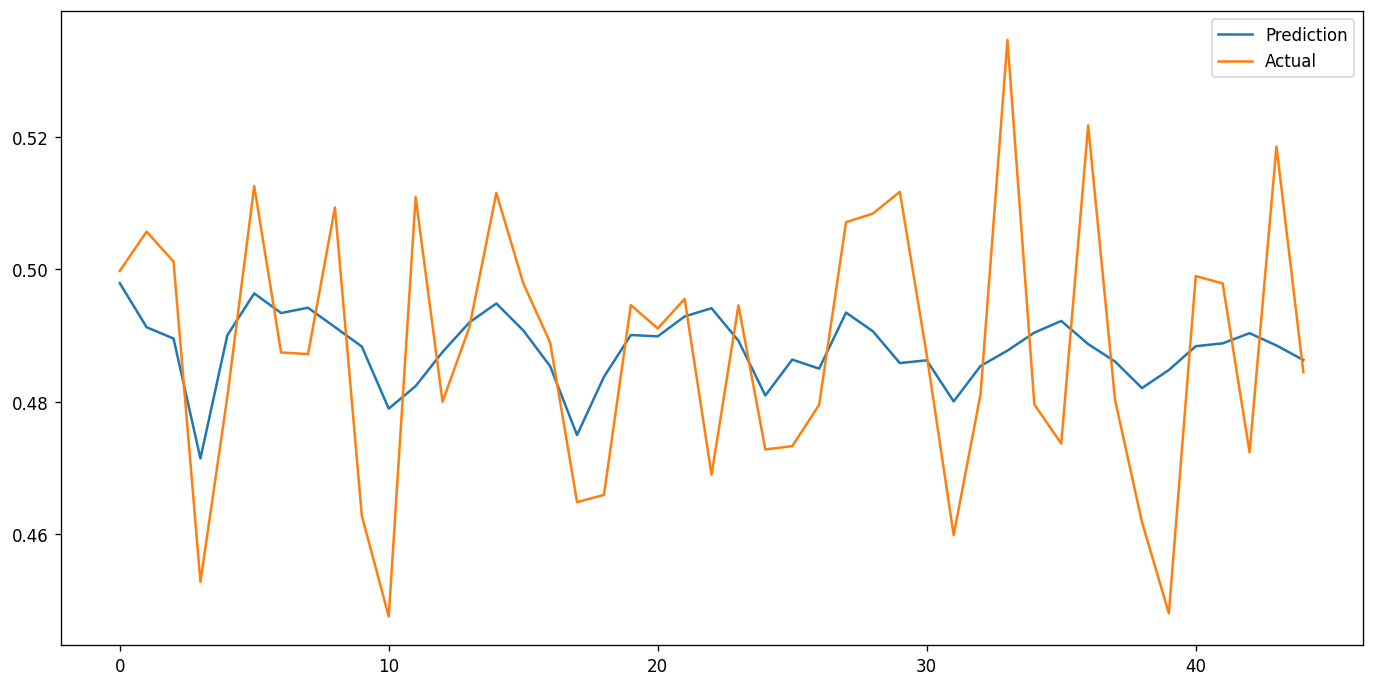

In [ ]:
df_ret[["Prediction", "Actual"]].plot(figsize=(14, 7))

## 8.Autoregressive Integrated Moving Average (ARIMA) Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
def ARIMA_model(train,test):
    # fit model
    model = ARIMA(train, order=(1,0, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Prediction":yhat, "Actual":test})
    return res, yhat

In [ ]:
df_ret, yhat = ARIMA_model(train_set, test_set)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error as mse

error = mse(test_set, yhat)
print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 0.000396
test RMSE: 0.0199


In [ ]:
df_ret

,Prediction,Actual
0,0.495724,0.499745
1,0.492707,0.505683
2,0.490797,0.501168
3,0.489587,0.452831
4,0.488822,0.480739
5,0.488337,0.512570
6,0.488030,0.487443
7,0.487835,0.487201
8,0.487712,0.509326
9,0.487634,0.462801


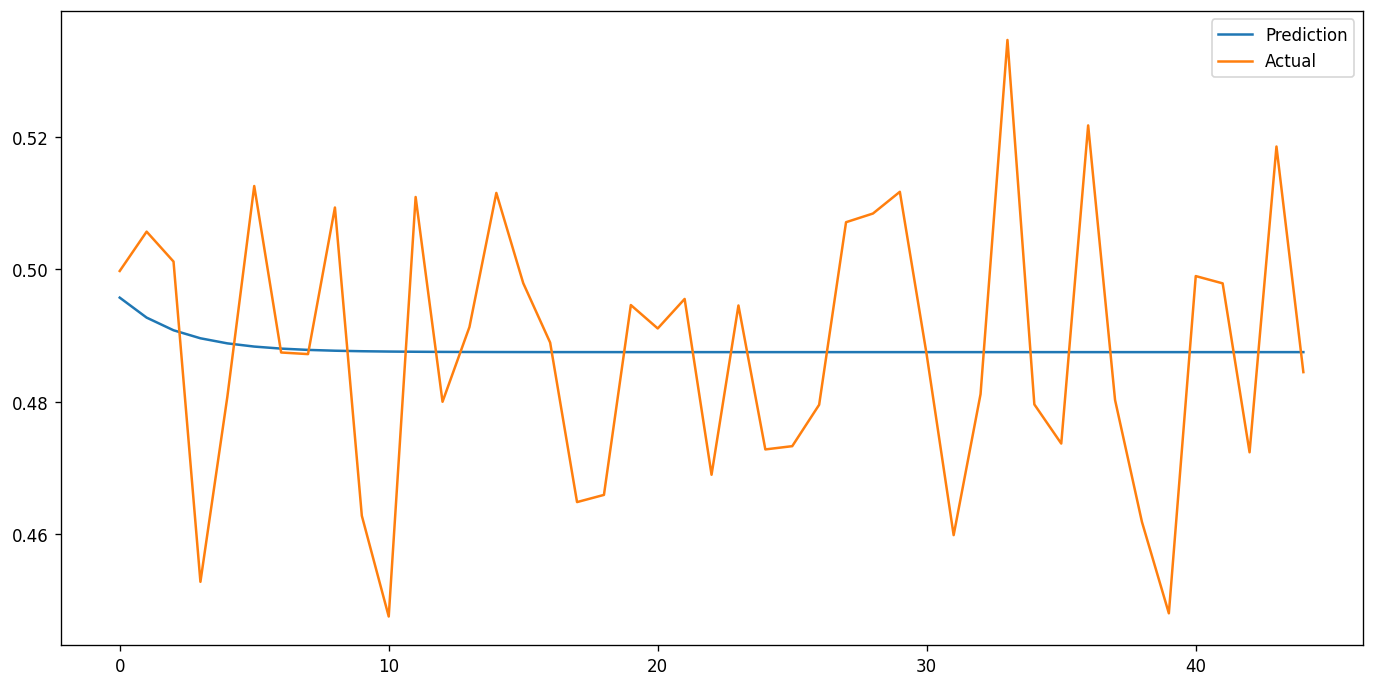

In [ ]:
df_ret[["Prediction", "Actual"]].plot(figsize=(14, 7))

# Deep Learning Univariate Models

Univariate Models on Yield-
1.  Vanila LSTM
2.  Stacked LSTM
3.  Bidirectional LSTM
4.  Conv LSTM
5.  GRU
6.  CNN
7.  Attention- GRU- CNN- LSTM



## Pre-Processing the Dataset

### Normalizing the Time Series Data

In [ ]:
# Normalize time series data
values = df.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)

Min: 0.106733, Max: 686.000000


In [ ]:
normalized.shape

(2951, 1)

In [ ]:
# Split train, test data
# Since this is a single step forecast, only the last index is removed from training dataset
train_seq1 = normalized[:2600] # LSTM perform best between 200 ~ 400 datapoint
test_seq1 = normalized[2600:]


### Reshape Model input to Sequences

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y) # x = [samples, timesteps]

In [ ]:
# Splits the univariate series into six samples where each sample has three input time steps and one output time step.
input_sequence = train_seq1 # Training dataset

# choose a number of time steps
n_steps = 30

# split into samples
x, y = split_sequence(input_sequence, n_steps)

# summarize the databb
for i in range(len(x)):
	print(x[i], y[i])

n_features = 1 # univariate
# reshape from [samples, timesteps] into [samples, timesteps, features]
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [ ]:
arr1 = input_sequence[-n_steps:]
arr2 = test_seq1
x_test = np.concatenate((arr1, arr2), axis=0) #Making the Testing Data

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def model_eval(y, predictions):    
        # Mean absolute error (MAE)
        mae = mean_absolute_error(y, predictions)
    
        # Mean squared error (MSE)
        mse = mean_squared_error(y, predictions)
    
    
        # SMAPE is an alternative for MAPE when there are zeros in the testing data. It
        # scales the absolute percentage by the sum of forecast and observed values
        SMAPE = np.mean(np.abs((y - predictions) / ((y + predictions)/2))) * 100
    
    
        # Calculate the Root Mean Squared Error
        rmse = np.sqrt(mean_squared_error(y, predictions))
    
        # Calculate the Mean Absolute Percentage Error
        # y, predictions = check_array(y, predictions)
        MAPE = np.mean(np.abs((y - predictions) / y)) * 100
    
        # mean_forecast_error
        mfe = np.mean(y - predictions)
    
        # NMSE normalizes the obtained MSE after dividing it by the test variance. It
        # is a balanced error measure and is very effective in judging forecast
        # accuracy of a model.
    
        # normalised_mean_squared_error
        NMSE = mse / (np.sum((y - np.mean(y)) ** 2)/(len(y)-1))
    
    
        # theil_u_statistic
        # It is a normalized measure of total forecast error.
        error = y - predictions
        mfe = np.sqrt(np.mean(predictions**2))
        mse = np.sqrt(np.mean(y**2))
        rmse = np.sqrt(np.mean(error**2))
        theil_u_statistic =  rmse / (mfe*mse)

        
        # mean_absolute_scaled_error
        # This evaluation metric is used to over come some of the problems of MAPE and
        # is used to measure if the forecasting model is better than the naive model or
        # not.
    
        
        # Print metrics
        print('Mean Absolute Error:', round(mae, 3))
        print('Mean Squared Error:', round(mse, 3))
        print('Root Mean Squared Error:', round(rmse, 3))
        print('Mean absolute percentage error:', round(MAPE, 3))
        print('Scaled Mean absolute percentage error:', round(SMAPE, 3))
        print('Mean forecast error:', round(mfe, 3))
        print('Normalised mean squared error:', round(NMSE, 3))
        print('Theil_u_statistic:', round(theil_u_statistic, 3))

## Model Training & Comparison

### Vanilla LSTM (n_steps = 30)

In [ ]:
def vanilla_lstm(x,y):
  from keras.models import Sequential
  from keras.layers import LSTM
  from keras.layers import Dense
  n_features = 1 # univariate

  # define model 
  vmodel = Sequential()
  vmodel.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features))) # 200 LSTM units in the hidden layer
  vmodel.add(Dense(1))
  vmodel.compile(optimizer='adam', loss='mse') #  Adam version of stochastic gradient descent 

  # fit model
  history = vmodel.fit(x, y, epochs=100, verbose=1)
  plt.style.use('classic')
  plt.plot(history.history["loss"])
  return vmodel

In [ ]:
vmodel=vanilla_lstm(x, y)

In [ ]:
def pred(x_test,model):
  predictions = []
  for i in range(len(x_test)-n_steps):
    
    input = x_test[i:i+n_steps]
    x_input = input.reshape((1, n_steps, n_features))
    yhat_sequence = model.predict(x_input, verbose=1)
    # store the predictions
    predictions.append(yhat_sequence)
  predictions = np.asarray(predictions)
  return predictions

In [ ]:
predictions=pred(x_test, vmodel)

In [ ]:
def pred_plot(predictions,test_seq1):
  predictions = predictions.reshape(len(test_seq1),)
  test_seq1 = test_seq1.reshape(len(test_seq1),)
  data_before_rescaling = pd.DataFrame({'Prediction':predictions, 'Actual':test_seq1})
  data_before_rescaling[["Prediction", "Actual"]].plot(figsize=(14, 7))

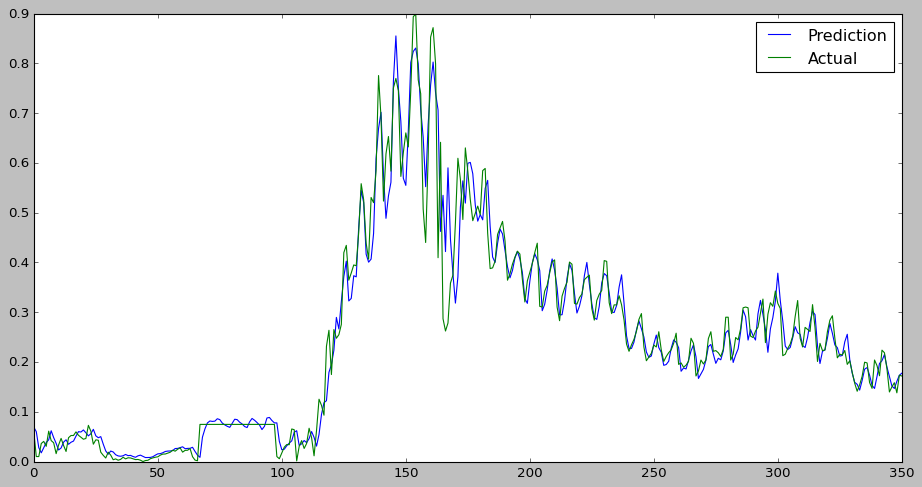

In [ ]:
pred_plot(predictions, test_seq1)

In [ ]:
def pred_plot_rescaling(predictions,test_seq1):
  predictions = predictions.reshape(-1,1)
  inversed_yhat = scaler.inverse_transform(predictions)
  test_seq1 = test_seq1.reshape(-1,1)
  actual = scaler.inverse_transform(test_seq1)
  inversed_yhat = inversed_yhat.reshape(len(test_seq1),)
  actual = actual.reshape(len(test_seq1),)
  d_scal = pd.DataFrame({'Prediction':inversed_yhat, 'Actual':actual})
  d_scal[["Prediction", "Actual"]].plot(figsize=(14, 7))

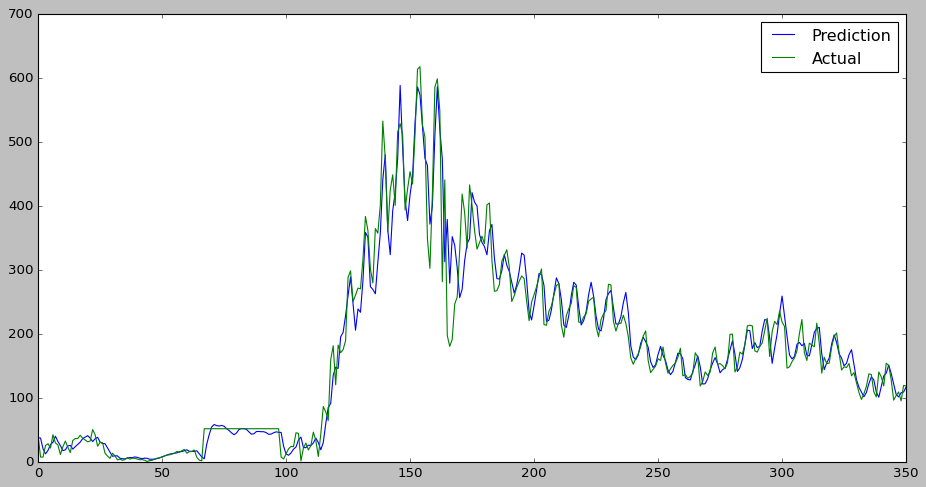

In [ ]:
pred_plot_rescaling(predictions,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions = predictions.reshape(len(test_seq1),)
model_eval(predictions,array(test_seq1))

Mean Absolute Error: 0.027
Mean Squared Error: 0.311
Root Mean Squared Error: 0.048
Mean absolute percentage error: 19.674
Scaled Mean absolute percentage error: 20.805
Mean forecast error: 0.314
Normalised mean squared error: 0.061
Theil_u_statistic: 0.489


### Vanilla LSTM (n_steps = 15)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
n_features = 1 # univariate

# define model 
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(15, n_features))) # 50 LSTM units in the hidden layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse') #  Adam version of stochastic gradient descent 

In [ ]:
# fit model
history = model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
81/81 [==============================] - 5s 39ms/step - loss: 0.0101
Epoch 2/200
81/81 [==============================] - 3s 39ms/step - loss: 0.0042
Epoch 3/200
81/81 [==============================] - 3s 36ms/step - loss: 0.0039
Epoch 4/200
81/81 [==============================] - 3s 36ms/step - loss: 0.0038
Epoch 5/200
81/81 [==============================] - 3s 38ms/step - loss: 0.0035
Epoch 6/200
81/81 [==============================] - 3s 35ms/step - loss: 0.0035
Epoch 7/200
81/81 [==============================] - 3s 33ms/step - loss: 0.0036
Epoch 8/200
81/81 [==============================] - 3s 37ms/step - loss: 0.0034
Epoch 9/200
81/81 [==============================] - 3s 38ms/step - loss: 0.0032
Epoch 10/200
81/81 [==============================] - 3s 36ms/step - loss: 0.0030
Epoch 11/200
81/81 [==============================] - 3s 35ms/step - loss: 0.0028
Epoch 12/200
81/81 [==============================] - 3s 37ms/step - loss: 0.0028
Epoch 13/200
81/81 [=====

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions = predictions.reshape(len(test_seq1),)
model_eval(predictions,array(test_seq1))

Mean Absolute Error: 0.028211
Mean Squared Error: 0.308953
Root Mean Squared Error: 0.05312
Mean absolute percentage error: 18.935478
Scaled Mean absolute percentage error: 21.630273
Mean forecast error: 0.313719
Normalised mean squared error: 0.077999
Theil_u_statistic: 0.54806


### Stacked LSTM

In [ ]:
def stacked_lstm(x,y):
  # define model
  model = Sequential()
  model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features))) #3D output from hidden LSTM layer as input to the next.
  model.add(LSTM(50, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # fit model
  history=model.fit(x, y, epochs=100, verbose=1)
  plt.style.use('classic')
  plt.plot(history.history["loss"])
  return model

In [ ]:
model=stacked_lstm(x,y)

In [ ]:
predictions_StackedLSTM=pred(x_test, model)

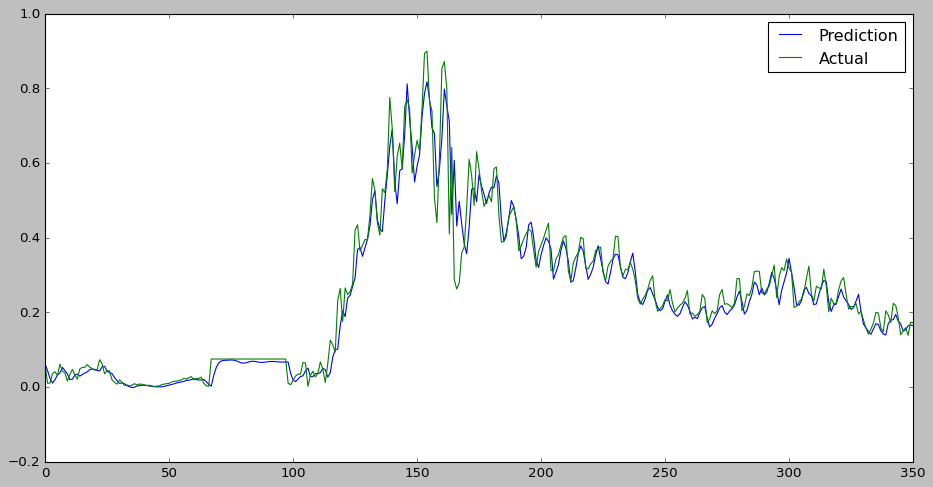

In [ ]:
pred_plot(predictions_StackedLSTM,test_seq1)

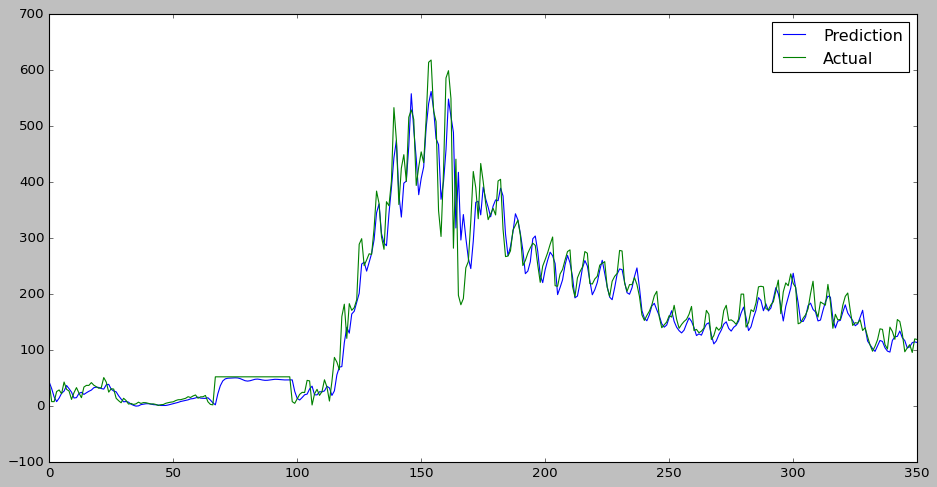

In [ ]:
pred_plot_rescaling(predictions_StackedLSTM,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_StackedLSTM = predictions_StackedLSTM.reshape(len(test_seq1),)
model_eval(predictions_StackedLSTM,array(test_seq1))

Mean Absolute Error: 0.027
Mean Squared Error: 0.303
Root Mean Squared Error: 0.048
Mean absolute percentage error: 81.527
Scaled Mean absolute percentage error: 24.749
Mean forecast error: 0.314
Normalised mean squared error: 0.062
Theil_u_statistic: 0.501


In [ ]:
model.save('stacked_lstm.h5')

### Bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional
def bidirectional_lstm(x,y):
  # define model
  model = Sequential()
  model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # fit model
  history=model.fit(x, y, epochs=100, verbose=1)
  plt.style.use('classic')
  plt.plot(history.history["loss"])

  return model

Epoch 1/100
81/81 [==============================] - 13s 135ms/step - loss: 0.0221
Epoch 2/100
81/81 [==============================] - 13s 155ms/step - loss: 0.0056
Epoch 3/100
81/81 [==============================] - 11s 132ms/step - loss: 0.0041
Epoch 4/100
81/81 [==============================] - 8s 98ms/step - loss: 0.0038
Epoch 5/100
81/81 [==============================] - 12s 143ms/step - loss: 0.0037
Epoch 6/100
81/81 [==============================] - 8s 96ms/step - loss: 0.0036
Epoch 7/100
81/81 [==============================] - 8s 94ms/step - loss: 0.0035
Epoch 8/100
81/81 [==============================] - 8s 93ms/step - loss: 0.0034
Epoch 9/100
81/81 [==============================] - 8s 96ms/step - loss: 0.0035
Epoch 10/100
81/81 [==============================] - 8s 96ms/step - loss: 0.0035
Epoch 11/100
81/81 [==============================] - 8s 95ms/step - loss: 0.0034
Epoch 12/100
81/81 [==============================] - 8s 98ms/step - loss: 0.0033
Epoch 13/100
81/8

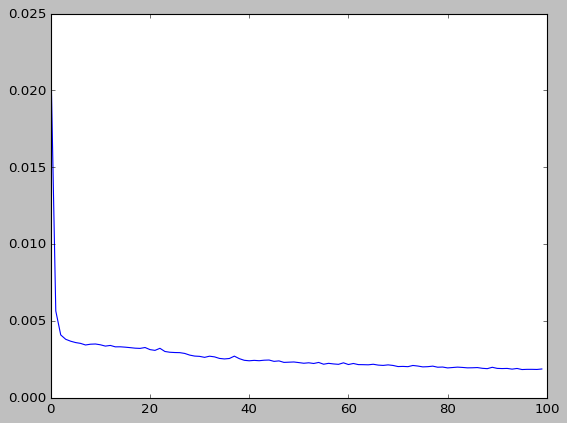

In [ ]:
model_bi=bidirectional_lstm(x,y)

In [ ]:
predictions_BiLSTM=pred(x_test, model_bi)

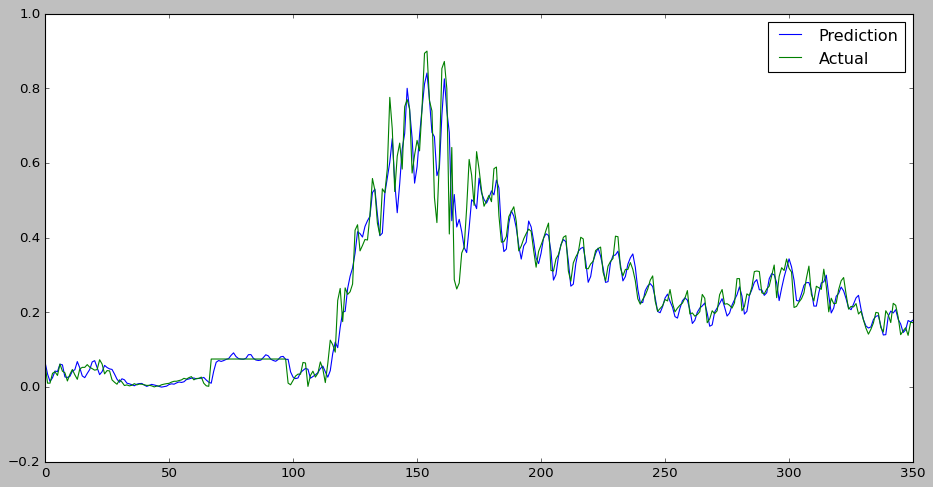

In [ ]:
pred_plot(predictions_BiLSTM,test_seq1)

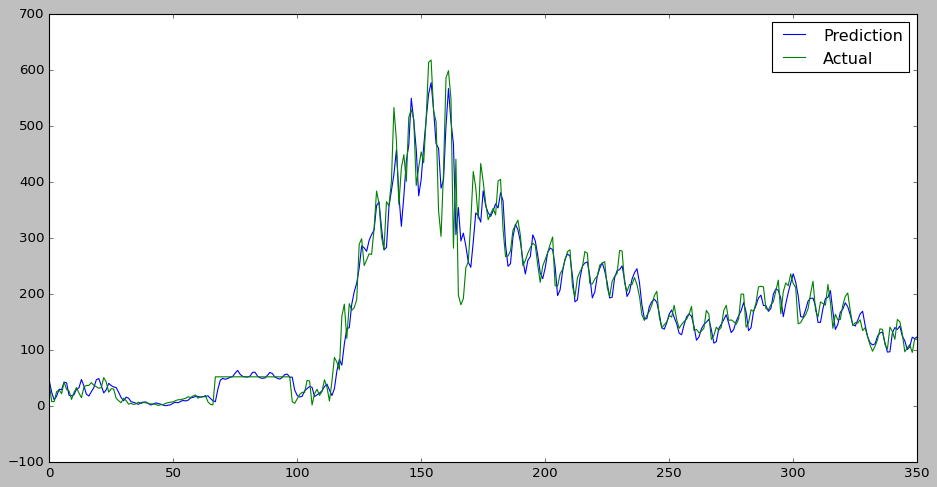

In [ ]:
pred_plot_rescaling(predictions_BiLSTM,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_BiLSTM = predictions_BiLSTM.reshape(len(test_seq1),)
model_eval(predictions_BiLSTM,array(test_seq1))

Mean Absolute Error: 0.026
Mean Squared Error: 0.306
Root Mean Squared Error: 0.044
Mean absolute percentage error: 27.134
Scaled Mean absolute percentage error: 21.238
Mean forecast error: 0.314
Normalised mean squared error: 0.054
Theil_u_statistic: 0.462


In [ ]:
model.save('bidirectional_lstm.h5')

### ConvLSTM

In [ ]:
def ConvLSTM(x, y):
  from keras.layers import ConvLSTM2D
  from keras.layers import Flatten
  n_seq = 1
  x = x.reshape((x.shape[0], n_seq, 1, n_steps, n_features))

  # define model
  model = Sequential()
  # two-dimensional kernel size in terms of (rows, columns)
  model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
  model.add(Flatten())
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # fit model
  history=model.fit(x, y, epochs=100, verbose=1)
  plt.style.use('classic')
  plt.plot(history.history["loss"])
  return model


In [ ]:
model_conv=ConvLSTM(x,y)

In [ ]:
input = x_test[i:i+n_steps]
#print(input)
x_input = input.reshape((1,1, 1, n_steps, n_features))
print(x_input.shape)

(1, 1, 1, 30, 1)


In [ ]:
predictions = []
n_seq=1
for i in range(len(x_test)-n_steps):
  
    input = x_test[i:i+n_steps]
    x_input = input.reshape((1,n_seq, 1, n_steps, n_features))
    yhat_sequence = model_conv.predict(x_input, verbose=1)
    # store the predictions
    predictions.append(yhat_sequence)
predictions = np.asarray(predictions) 

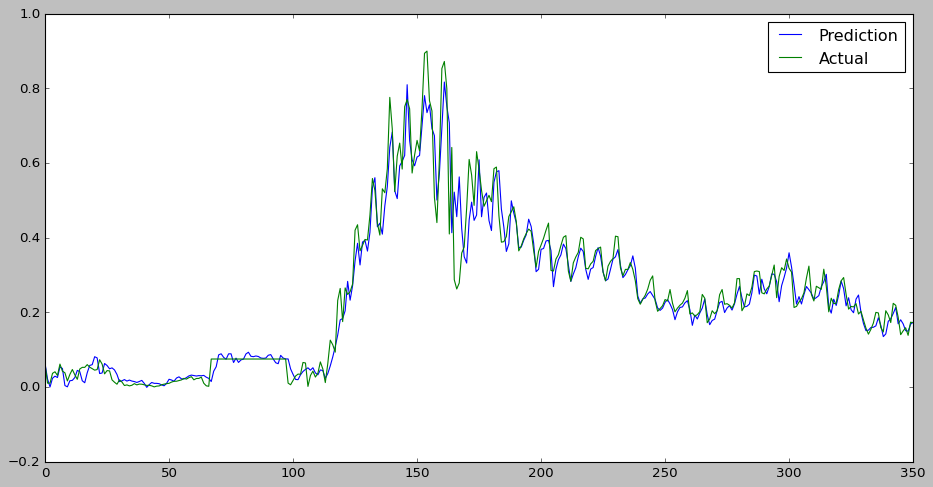

In [ ]:
pred_plot(predictions,test_seq1)

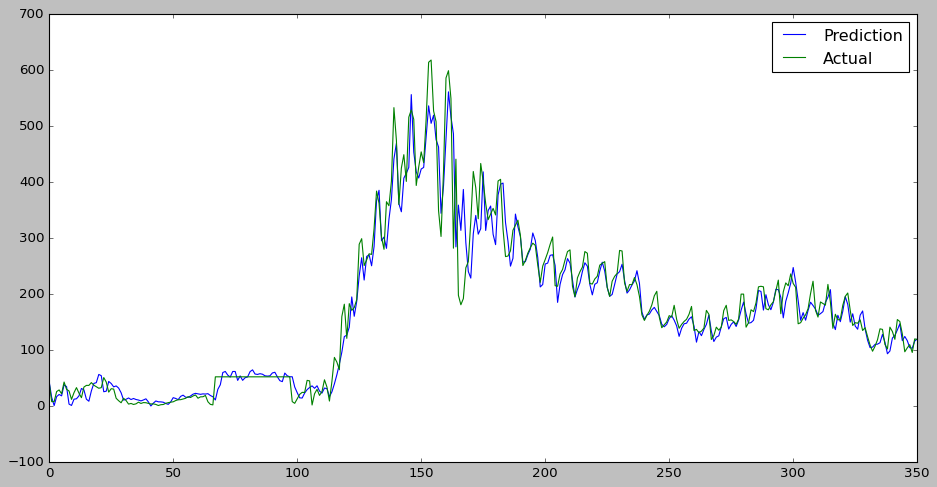

In [ ]:
pred_plot_rescaling(predictions,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_conv = predictions.reshape(len(test_seq1),)
model_eval(predictions_conv,array(test_seq1))

Mean Absolute Error: 0.028
Mean Squared Error: 0.301
Root Mean Squared Error: 0.048
Mean absolute percentage error: 71.537
Scaled Mean absolute percentage error: 24.715
Mean forecast error: 0.314
Normalised mean squared error: 0.067
Theil_u_statistic: 0.512


In [ ]:
model.save('conv_lstm.h5')

### GRU Model

In [ ]:
def GRU(x, y):
  from keras.layers import LSTM, GRU, Dense
  from keras.models import Sequential
  model_gru = Sequential()
  model_gru.add(GRU(75, return_sequences=True,input_shape=(n_steps, n_features)))
  model_gru.add(GRU(units=30, return_sequences=True))
  model_gru.add(GRU(units=30))
  model_gru.add(Dense(units=1))
  
  model_gru.compile(loss='mae', optimizer='adam')
  
  # fit model
  history = model_gru.fit(x, y, epochs=100, verbose=1)
  plt.style.use('classic')
  plt.plot(history.history["loss"])

  return model_gru

Epoch 1/100
81/81 [==============================] - 5s 8ms/step - loss: 0.0553
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0383
Epoch 3/100
81/81 [==============================] - 1s 8ms/step - loss: 0.0366
Epoch 4/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0321
Epoch 5/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0301
Epoch 6/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0293
Epoch 7/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0306
Epoch 8/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0284
Epoch 9/100
81/81 [==============================] - 1s 8ms/step - loss: 0.0282
Epoch 10/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0277
Epoch 11/100
81/81 [==============================] - 1s 7ms/step - loss: 0.0295
Epoch 12/100
81/81 [==============================] - 1s 8ms/step - loss: 0.0273
Epoch 13/100
81/81 [=================

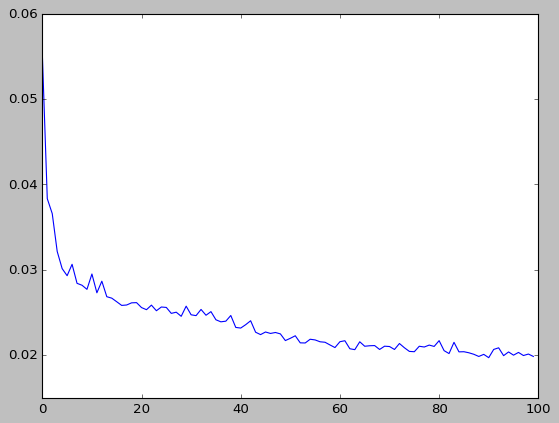

In [ ]:
model_gru=GRU(x,y)

In [ ]:
predictions_GRU=pred(x_test, model_gru)

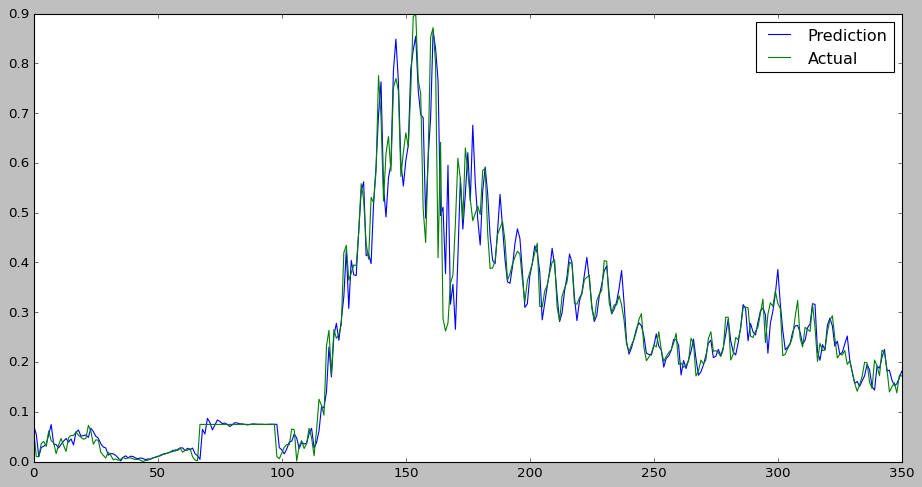

In [ ]:
pred_plot(predictions_GRU,test_seq1)

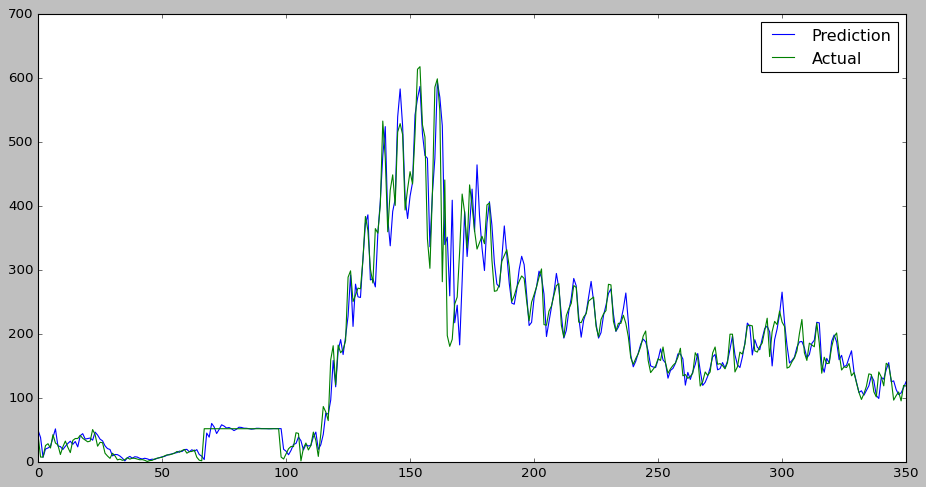

In [ ]:
pred_plot_rescaling(predictions_GRU,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_GRU = predictions_GRU.reshape(len(test_seq1),)
model_eval(predictions_GRU,array(test_seq1))

Mean Absolute Error: 0.023
Mean Squared Error: 0.315
Root Mean Squared Error: 0.046
Mean absolute percentage error: 19.239
Scaled Mean absolute percentage error: 17.052
Mean forecast error: 0.314
Normalised mean squared error: 0.056
Theil_u_statistic: 0.47


In [ ]:
model.save('gru.h5')

### CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Input
from keras.layers import Dropout

In [ ]:
def CNN(x, y):
    n_filters=(8,8,8)
    droprate=0.1
    model = Sequential([
        Input(shape=(n_steps, n_features, 1)),
        Conv2D(n_filters[0], kernel_size=(1, n_features), activation="relu"),
        Conv2D(n_filters[1], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(n_filters[2], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam', loss='mse')
    history=model.fit(x, y, epochs=100,  verbose=1)
    plt.style.use('classic')
    plt.plot(history.history["loss"])
    return model

In [ ]:
model_CNN=CNN(x,y)

In [ ]:
predictions_CNN=pred(x_test, model_CNN)

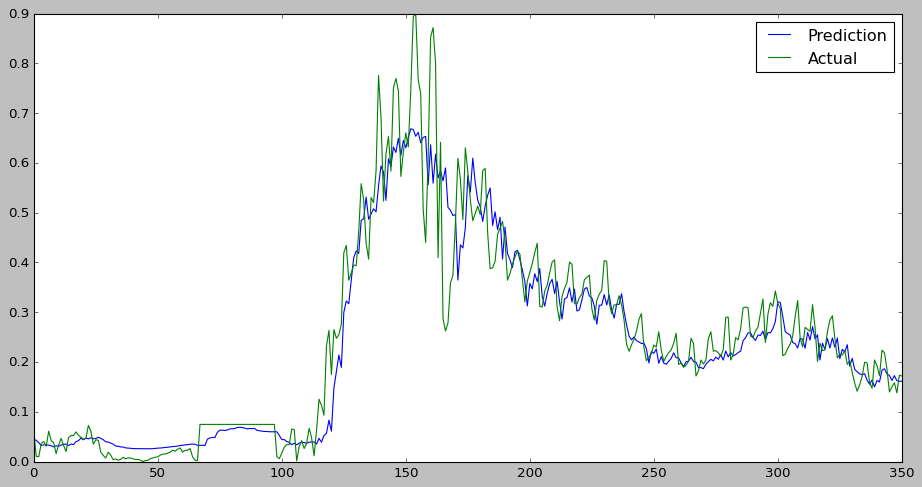

In [ ]:
pred_plot(predictions_CNN,test_seq1)

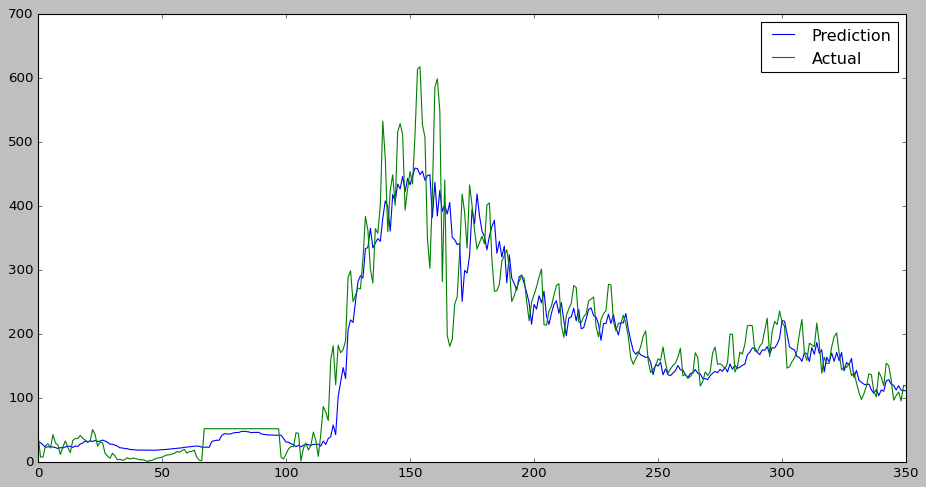

In [ ]:
pred_plot_rescaling(predictions_CNN,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_CNN = predictions_CNN.reshape(len(test_seq1),)
model_eval(predictions_CNN,array(test_seq1))

Mean Absolute Error: 0.037
Mean Squared Error: 0.306
Root Mean Squared Error: 0.061
Mean absolute percentage error: 23.348
Scaled Mean absolute percentage error: 29.308
Mean forecast error: 0.314
Normalised mean squared error: 0.11
Theil_u_statistic: 0.638


In [ ]:
model.save('CNN.h5')

### CNN-LSTM-GRU-Attention

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
!pip install keras-self-attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=dbfd17f03f4f218dfa1453b9a59f497303be6109120f5f333ceffd701c062d51
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [ ]:
def combined(x, y):
  import keras
  from keras_self_attention import SeqSelfAttention
  from keras.layers import LSTM, GRU, Dense
  from keras.models import Sequential

  model = Sequential()
  model.add(Conv1D(filters=120, kernel_size=3,
                            strides=1, padding="causal",
                            activation="relu",
                            input_shape=(n_steps, 1)))

  model.add(Conv1D(filters=120, kernel_size=3,
                            strides=1, padding="causal",
                            activation="relu")) #3D output from hidden LSTM layer as input to the next.

  model.add(LSTM(100, return_sequences=True, activation='relu'))
  model.add(SeqSelfAttention(attention_activation='sigmoid'))
  model.add(GRU(units=30, return_sequences=True))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # fit model
  history=model.fit(x, y, epochs=100, verbose=1)
  model.summary()
  return model

In [ ]:
model_Combined=combined(x,y)

In [ ]:
predictions_combined=pred(x_test, model_Combined)

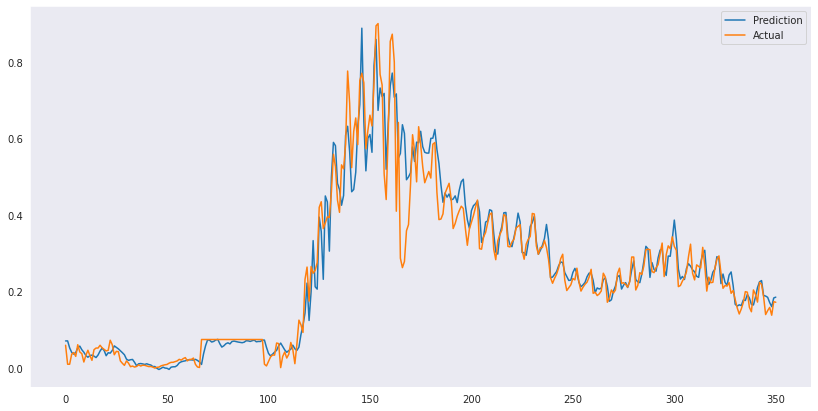

In [ ]:
pred_plot(predictions_combined,test_seq1)

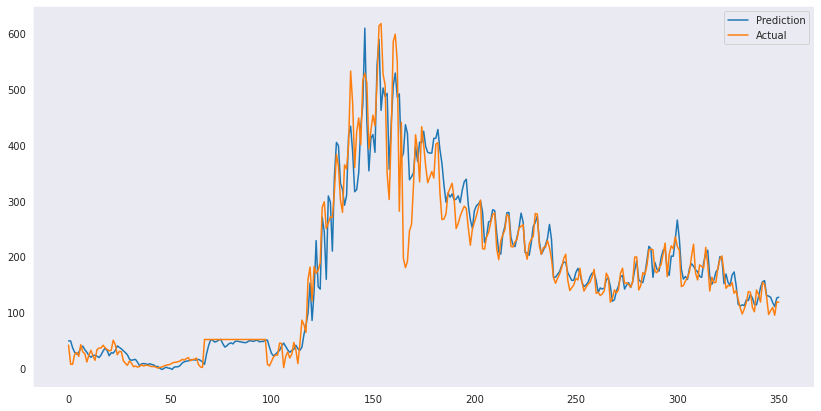

In [ ]:
pred_plot_rescaling(predictions_combined,test_seq1)

In [ ]:
test_seq1 = test_seq1.reshape(len(test_seq1),)
predictions_combined = predictions_combined.reshape(len(test_seq1),)
model_eval(predictions_combined,array(test_seq1))

Mean Absolute Error: 0.031
Mean Squared Error: 0.32
Root Mean Squared Error: 0.055
Mean absolute percentage error: 52.493
Scaled Mean absolute percentage error: 29.202
Mean forecast error: 0.314
Normalised mean squared error: 0.077
Theil_u_statistic: 0.551


In [ ]:
model_Combined.save('Combined.h5')